# Ejercicios de Análisis de Datos de Ventas

En este notebook se proponen 10 ejercicios diferentes utilizando un dataset de ventas. Cada ejercicio requiere aplicar operaciones de agrupación (*groupby*), conteo de valores (*value_counts*), cálculos de medias, y generar visualizaciones para responder preguntas específicas.

El dataset de ejemplo tiene la siguiente estructura:

| InvoiceNo | StockCode | Description                                    | Quantity | InvoiceDate        | UnitPrice | CustomerID | Country        |
|-----------|-----------|------------------------------------------------|----------|--------------------|-----------|------------|----------------|
| 536365    | 85123A    | WHITE HANGING HEART T-LIGHT HOLDER             | 6        | 12/1/2010 8:26     | 2.55      | 17850.0    | United Kingdom |
| 536365    | 71053     | WHITE METAL LANTERN                            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |
| 536365    | 84406B    | CREAM CUPID HEARTS COAT HANGER                 | 8        | 12/1/2010 8:26     | 2.75      | 17850.0    | United Kingdom |
| 536365    | 84029G    | KNITTED UNION FLAG HOT WATER BOTTLE            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |

Puedes ampliar el dataset según sea necesario para los ejercicios.

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
!unzip customer_segmentation.csv.zip

--2025-10-22 20:20:35--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip [following]
--2025-10-22 20:20:36--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7548720 (7.2M) [application/zip]
Saving to: ‘customer_segmentation.csv.zip’

customer_s

## Preparación del Dataset

Primero, importamos las librerías necesarias, creamos el DataFrame de ejemplo y realizamos las conversiones correspondientes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Creación del DataFrame de ejemplo
data = pd.read_csv('customer_segmentation.csv',encoding="latin-1")

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Convertir InvoiceDate a tipo datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Mostrar el DataFrame
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Ejercicio 1: Exploración del Dataset

Realiza una exploración básica del dataset: muestra las primeras filas, la información general (con `.info()`) y verifica si hay datos nulos.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Ejercicio 2: Agrupación por País

Agrupa los datos por la columna `Country` para:
- Calcular el total de `Quantity` vendido por país.
- Calcular la media de `UnitPrice` por país.

Visualiza el total de `Quantity` por país utilizando un gráfico de barras. Dame los 5 primeros

CountriesTotalQuantity=data.groupby('Country')["Quantity"].sum().sort_values(ascending=False).head(5).reset_index()

In [5]:
data.groupby('Country')["Quantity"].sum().sort_values(ascending=False).head(5)

,Quantity
Country,
United Kingdom,4263829
Netherlands,200128
EIRE,142637
Germany,117448
France,110480


In [6]:
data.groupby('Country')["UnitPrice"].mean()

,UnitPrice
Country,
Australia,3.220612
Austria,4.243192
Bahrain,4.556316
Belgium,3.644335
Brazil,4.456250
Canada,6.030331
Channel Islands,4.932124
Cyprus,6.302363
Czech Republic,2.938333


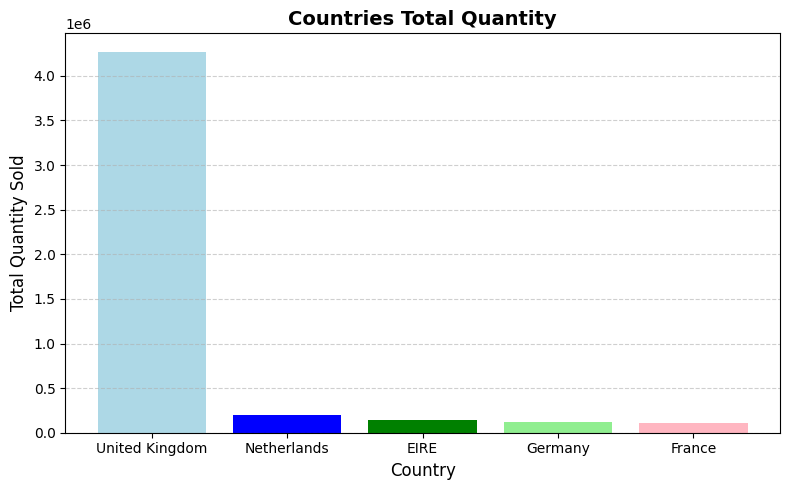

In [7]:
# Get the top 5 countries by quantity
CountriesTotalQuantity=data.groupby('Country')["Quantity"].sum().sort_values(ascending=False).head(5).reset_index()

# Visualize the top 5 countries by quantity
plt.figure(figsize=(8, 5))
plt.bar(CountriesTotalQuantity["Country"],CountriesTotalQuantity['Quantity'] ,color=['lightblue', 'blue','green', 'lightgreen', 'lightpink'])
plt.title('Countries Total Quantity', fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Ejercicio 3: Frecuencia de StockCode

Agrupa el DataFrame por `StockCode` y cuenta la frecuencia de cada producto. Utiliza `value_counts` para verificar el resultado.

Visualiza los StockCode más frecuentes con un gráfico de barras horizontal. Dame los 10 primeros

In [8]:
Stock=data["StockCode"].value_counts().sort_values(ascending=False).head(10).reset_index()

In [9]:
Stock

,StockCode,count
0,85123A,2313
1,22423,2203
2,85099B,2159
3,47566,1727
4,20725,1639
5,84879,1502
6,22720,1477
7,22197,1476
8,21212,1385
9,20727,1350


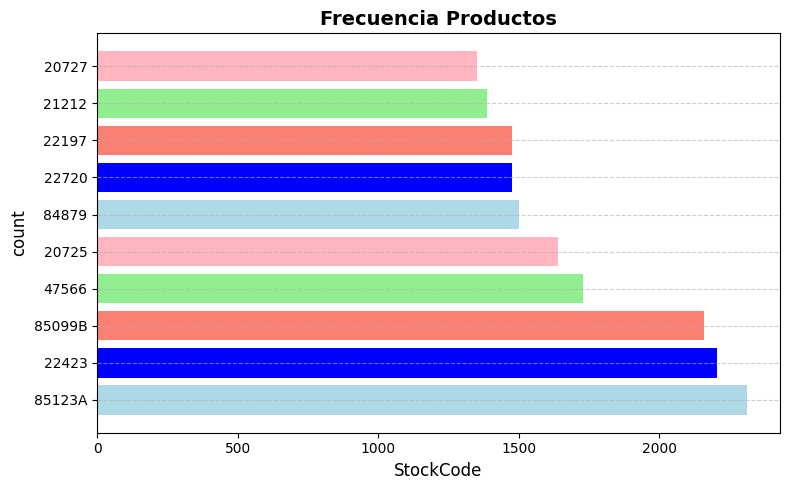

In [10]:
plt.figure(figsize=(8, 5))
plt.barh(Stock["StockCode"],Stock['count'] ,color=['lightblue', 'blue','salmon', 'lightgreen', 'lightpink'])
plt.title('Frecuencia Productos', fontsize=14, fontweight='bold')
plt.xlabel('StockCode', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Ejercicio 4: Ventas Totales por Factura

1. Crea una nueva columna llamada `TotalPrice` que sea el producto de `Quantity` y `UnitPrice`.
2. Agrupa los datos por `InvoiceNo` y calcula la suma de `TotalPrice` para cada factura.
3. Calcula la factura promedio (media) del total de ventas por factura.

Visualiza la distribución de los totales de factura con un histograma.

In [11]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [16]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


In [14]:
totales_factura = data.groupby('InvoiceNo')['TotalPrice'].sum().reset_index()

In [19]:
factura_promedio = totales_factura['TotalPrice'].mean()
print(f'El total promedio por factura es: {factura_promedio:.2f}')

El total promedio por factura es: 376.36


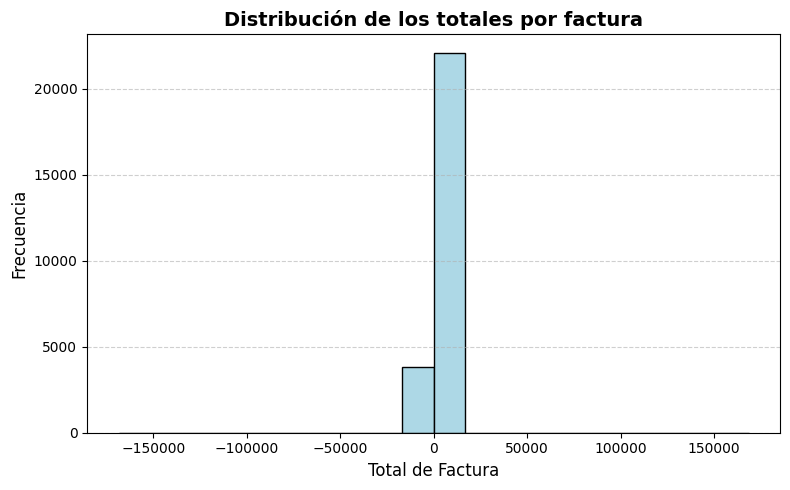

In [24]:
plt.figure(figsize=(8, 5))
plt.hist(totales_factura['TotalPrice'], bins=20, color='lightblue', edgecolor='black')
plt.title('Distribución de los totales por factura', fontsize=14, fontweight='bold')
plt.xlabel('Total de Factura', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Ejercicio 5: Evolución Temporal de Ventas

Utiliza la columna `InvoiceDate` para visualizar cómo evoluciona el valor de `TotalPrice` a lo largo del tiempo.

Realiza un gráfico de líneas donde el eje x sea la fecha y el eje y sea `TotalPrice`.

In [27]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
ventas_diarias = data.groupby(data['InvoiceDate'].dt.date)['TotalPrice'].sum().reset_index()

In [31]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


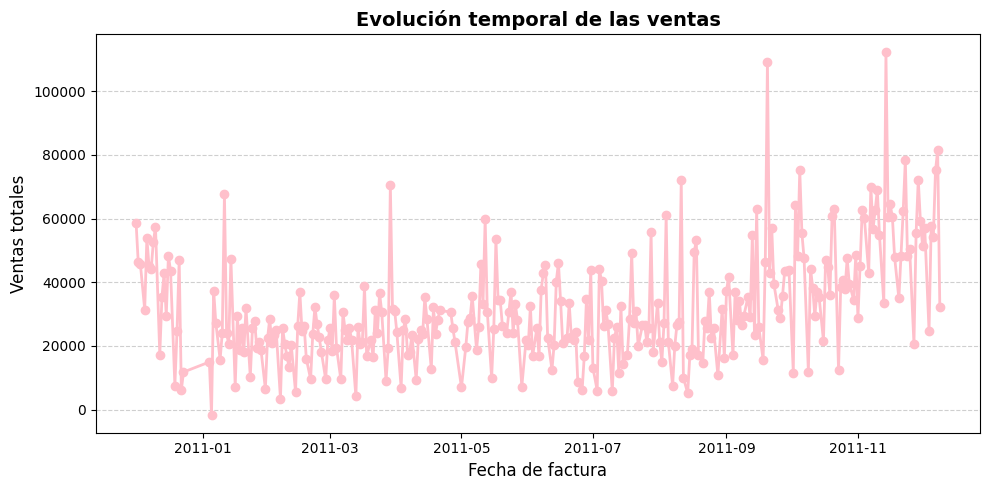

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(ventas_diarias['InvoiceDate'], ventas_diarias['TotalPrice'], color='pink', marker='o', linewidth=2)

plt.title('Evolución temporal de las ventas', fontsize=14, fontweight='bold')
plt.xlabel('Fecha de factura', fontsize=12)
plt.ylabel('Ventas totales', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Ejercicio 6: Boxplot de UnitPrice por País

Crea un boxplot para visualizar la distribución de `UnitPrice` en función de `Country`.

Este gráfico ayudará a identificar la dispersión y posibles valores atípicos en los precios.

In [32]:
data_filtrada = data[data['UnitPrice'] > 0].dropna(subset=['Country', 'UnitPrice'])

/tmp/ipython-input-1187916238.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='UnitPrice', data=data_filtrada,
/tmp/ipython-input-1187916238.py:2: UserWarning: 
The palette list has fewer values (5) than needed (38) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Country', y='UnitPrice', data=data_filtrada,


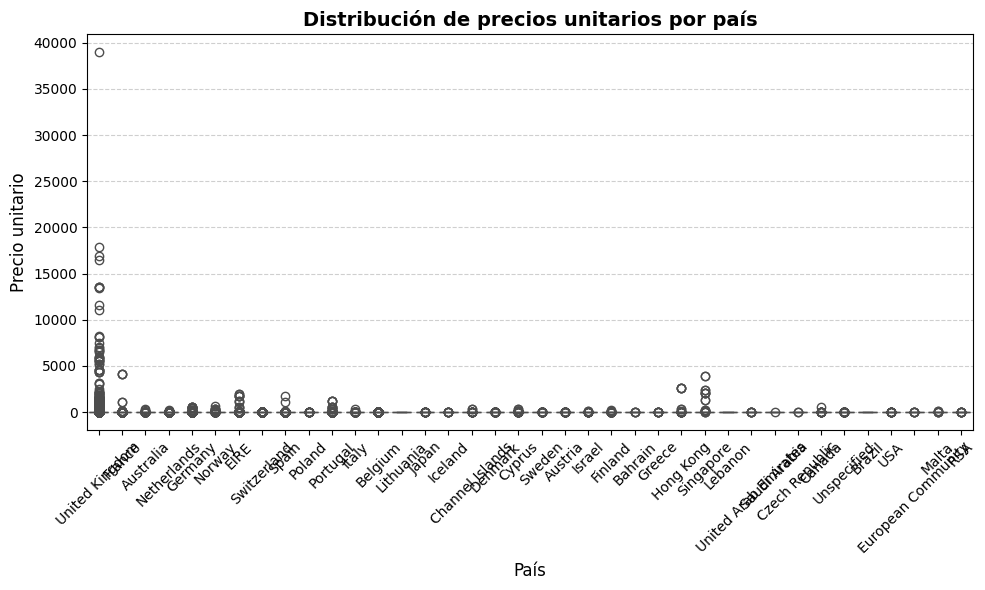

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='UnitPrice', data=data_filtrada,
            palette=['lightblue', 'blue', 'salmon', 'lightgreen', 'lightpink'])
plt.title('Distribución de precios unitarios por país', fontsize=14, fontweight='bold')
plt.xlabel('País', fontsize=12)
plt.ylabel('Precio unitario', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Ejercicio 7: Scatter Plot entre Quantity y UnitPrice

Realiza un scatter plot para analizar la relación entre `Quantity` y `UnitPrice`.

Observa si existe alguna tendencia o correlación entre la cantidad y el precio unitario.

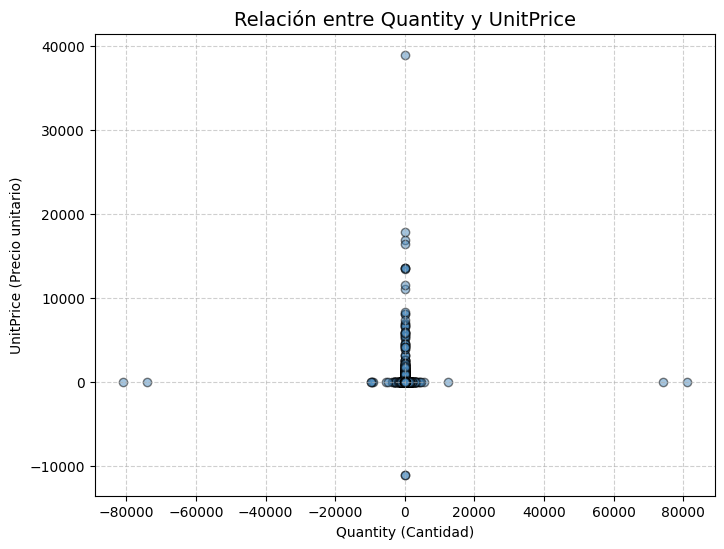

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(data['Quantity'], data['UnitPrice'], alpha=0.5, color='#4B8BBE', edgecolors='k')

plt.title('Relación entre Quantity y UnitPrice', fontsize=14)
plt.xlabel('Quantity (Cantidad)')
plt.ylabel('UnitPrice (Precio unitario)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

En el gráfico no se nota una relación clara entre la cantidad y el precio unitario. Los puntos están bastante dispersos, lo que muestra que el precio no cambia mucho según cuántas unidades se vendan. En otras palabras, parece que los productos tienen precios fijos sin descuentos por cantidad o promociones especiales.

## Ejercicio 8: Distribución de Clientes por País

Utilizando la columna `Country`, crea un gráfico de pastel (pie chart) que muestre la proporción de registros por país. Elimine los que tengan muy poco porcentaje)

Este gráfico es útil para visualizar la distribución geográfica de las ventas.

In [37]:
ventas_por_pais = data.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

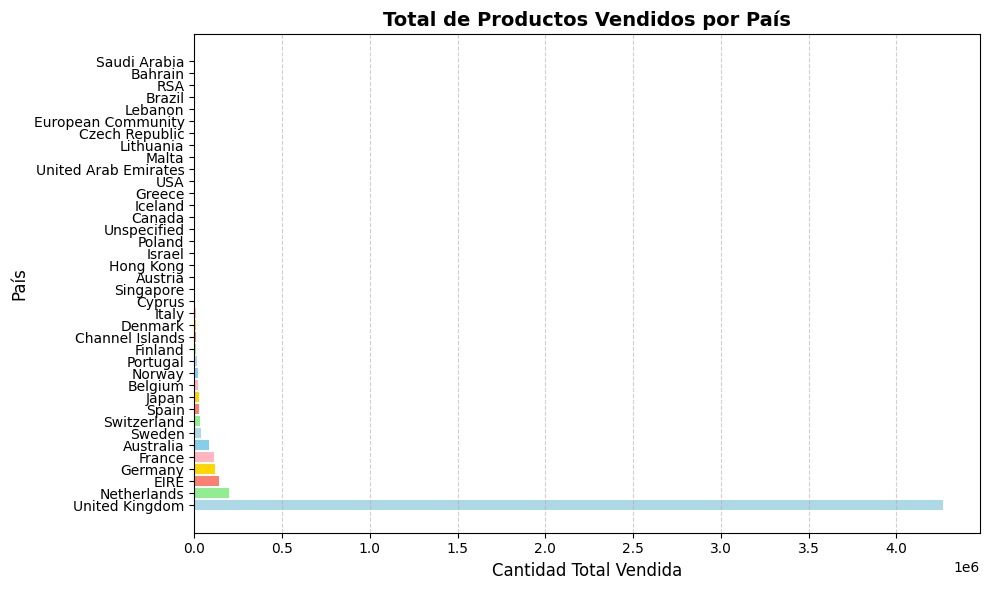

In [39]:
plt.figure(figsize=(10,6))
plt.barh(ventas_por_pais.index, ventas_por_pais.values,
         color=['lightblue', 'lightgreen', 'salmon', 'gold', 'lightpink', 'skyblue'])
plt.title('Total de Productos Vendidos por País', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad Total Vendida', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Ejercicio 9: Evolución del Precio Unitario Promedio

Agrupa los datos por la fecha (utilizando la columna `InvoiceDate`) para calcular el precio unitario promedio diario y visualízalo con un gráfico de líneas. (hagalo mensual )


Esta visualización permite observar tendencias en el precio a lo largo del tiempo.

In [40]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [41]:
precio_promedio = data.groupby(data['InvoiceDate'].dt.date)['UnitPrice'].mean()

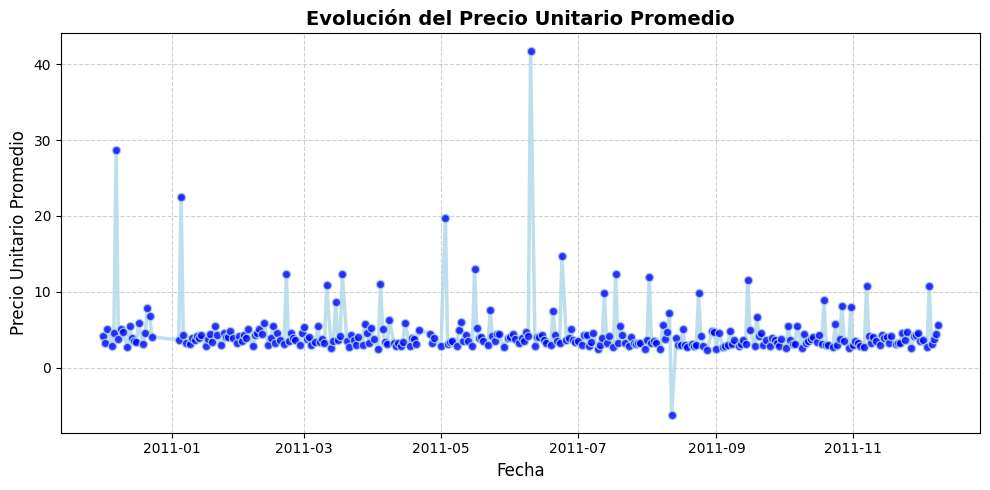

In [42]:
plt.figure(figsize=(10,5))
plt.plot(precio_promedio.index, precio_promedio.values,
         color='lightblue', linewidth=2.5, marker='o', markerfacecolor='blue', alpha=0.8)
plt.title('Evolución del Precio Unitario Promedio', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio Unitario Promedio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Ejercicio 10: Frecuencia de Productos por Descripción

Agrupa el dataset por la columna `Description` y cuenta la frecuencia de cada producto.

Visualiza los 5 productos más frecuentes con un gráfico de barras vertical.

In [46]:
frecuencia_productos = data['Description'].value_counts().head(5)

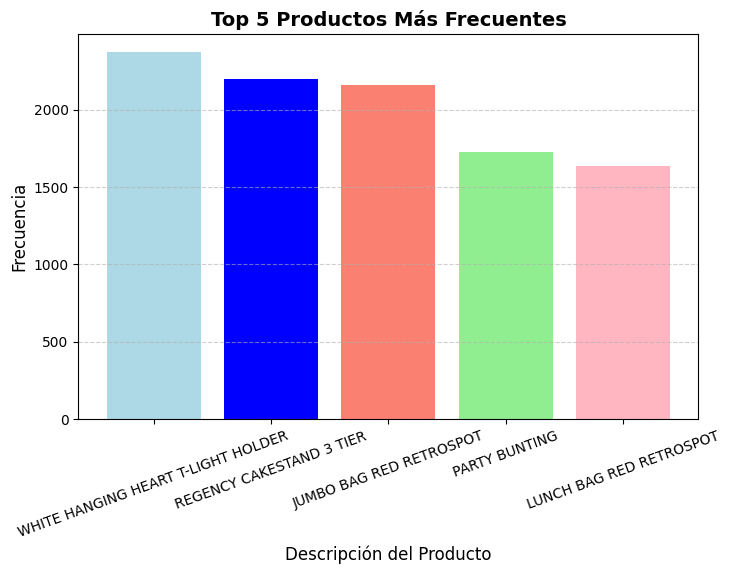

In [47]:
plt.figure(figsize=(8,5))
bars = plt.bar(frecuencia_productos.index, frecuencia_productos.values,
               color=['lightblue', 'blue', 'salmon', 'lightgreen', 'lightpink'])
plt.title('Top 5 Productos Más Frecuentes', fontsize=14, fontweight='bold')
plt.xlabel('Descripción del Producto', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=20, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.6)

## Conclusiones Generales

En este notebook se han propuesto 10 ejercicios que cubren desde la exploración básica del dataset hasta operaciones de agrupación y la generación de diferentes tipos de gráficos para responder a preguntas de análisis de ventas.

Recuerda comentar tu código y documentar tus hallazgos en celdas de markdown para que el proceso quede bien explicado.